In [1]:
import os
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

First we will load the mask dataset which we have already pre-processed.

In [2]:
data_dir = 'Processed Data'

X_train = np.load(os.path.join(data_dir, 'X_train.npy'))
X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
Y_train = np.load(os.path.join(data_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(data_dir, 'Y_test.npy'))

In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {X_train.shape}")

Shape of X_train: (7185, 224, 224, 3)
Shape of Y_train: (7185, 3)
Shape of X_test: (1797, 224, 224, 3)
Shape of Y_test: (7185, 224, 224, 3)


# VGG16

The VGG16 (Visual Geometry Group 16) is a deep convolutional neural network architecture proposed by researchers at the University of Oxford in 2014.The VGG16 architecture follows a relatively simple and uniform design pattern, consisting of a series of convolutional layers followed by max-pooling layers for spatial downsampling. The main distinguishing feature of VGG16 is the use of very small convolutional filters (3x3) throughout the entire architecture, which are convolved repeatedly to achieve the same effective receptive field as larger filters while reducing the number of parameters.

The VGG16 network comprises 16 weight layers, including 13 convolutional layers and 3 fully connected layers. The convolutional layers are organized into five blocks, with each block consisting of several convolutional layers followed by a max-pooling layer. The depth of the network allows it to learn increasingly complex and abstract representations of the input data, making it effective for various computer vision tasks.

During training, the VGG16 model is typically initialized with pre-trained weights from the ImageNet dataset, a large-scale image dataset containing over 14 million images across 1,000 object categories. This pre-training on a diverse dataset helps the model learn rich, low-level features that can be effectively transferred and fine-tuned for specific tasks like mask detection.


![MobileNetV2 Architecture](assets/vgg16.jpg)VGG Architecture Diagram Source: [Geeks for Geeks](https://www.geeksforgeeks.org/vgg-16-cnn-model/)


In [5]:
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable = False

input_layer = Input(shape=(224, 224, 3))

x = base_model(input_layer)

x = GlobalAveragePooling2D()(x)

output_layer = Dense(3, activation='softmax')(x)  

model_2 = Model(inputs=input_layer, outputs=output_layer)

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,716,227 (56.14 MB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
history1 = model_2.fit(X_train, Y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 583s 3s/step - accuracy: 0.5745 - loss: 0.9873 - val_accuracy: 0.7349 - val_loss: 0.6781
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.7748 - loss: 0.6302 - val_accuracy: 0.7878 - val_loss: 0.5637
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 663s 4s/step - accuracy: 0.8108 - loss: 0.5286 - val_accuracy: 0.8205 - val_loss: 0.5000
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.8396 - loss: 0.4709 - val_accuracy: 0.8323 - val_loss: 0.4615
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 673s 4s/step - accuracy: 0.8552 - loss: 0.4236 - val_accuracy: 0.8455 - val_loss: 0.4374
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 588s 3s/step - accuracy: 0.8536 - loss: 0.4070 - val_accuracy: 0.8483 - val_loss: 0.4141
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.8607 - loss: 0.3922 - val_accuracy: 0.8469 - val_loss: 0.3996
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.8738 - loss: 0.3632 - val_accu

In [7]:
history2 = model_2.fit(X_train, Y_train, validation_split = 0.2, epochs = 30)

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9028 - loss: 0.2781 - val_accuracy: 0.8803 - val_loss: 0.3091
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9058 - loss: 0.2715 - val_accuracy: 0.8838 - val_loss: 0.3020
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.9074 - loss: 0.2622 - val_accuracy: 0.8824 - val_loss: 0.3049
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9032 - loss: 0.2684 - val_accuracy: 0.8852 - val_loss: 0.2975
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.9079 - loss: 0.2630 - val_accuracy: 0.8880 - val_loss: 0.2926
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.9089 - loss: 0.2531 - val_accuracy: 0.8810 - val_loss: 0.2965
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.9084 - loss: 0.2557 - val_accuracy: 0.8907 - val_loss: 0.2879
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.9091 - loss: 0.2549 - val_accu

In [8]:
history3 = model_2.fit(X_train, Y_train, validation_split = 0.2, epochs = 30)

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.9334 - loss: 0.2050 - val_accuracy: 0.9144 - val_loss: 0.2394
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.9284 - loss: 0.2091 - val_accuracy: 0.9165 - val_loss: 0.2373
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.9309 - loss: 0.2058 - val_accuracy: 0.9165 - val_loss: 0.2384
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.9300 - loss: 0.1956 - val_accuracy: 0.9151 - val_loss: 0.2379
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.9328 - loss: 0.1994 - val_accuracy: 0.9144 - val_loss: 0.2343
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9404 - loss: 0.1938 - val_accuracy: 0.9235 - val_loss: 0.2330
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.9403 - loss: 0.1885 - val_accuracy: 0.9158 - val_loss: 0.2342
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9295 - loss: 0.2056 - val_accu

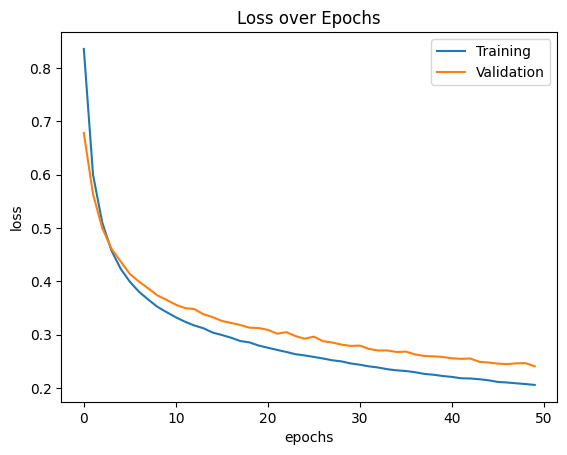

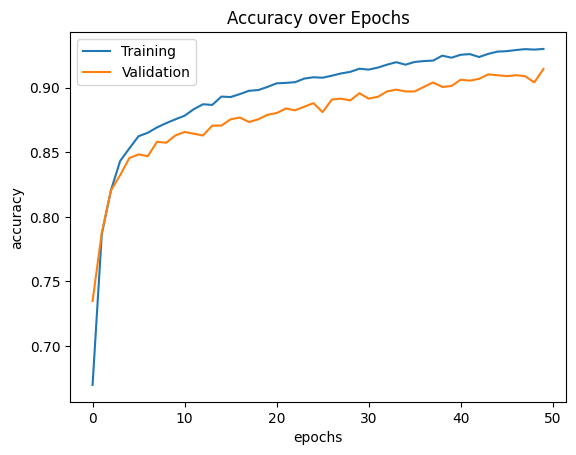

In [9]:
loss = []
val_loss = []
acc = []
val_acc= []

for i in range(1,3):
    his = eval(f'history{i}.history')
    loss += his["loss"]
    val_loss += his["val_loss"]
    
    acc += his["accuracy"]
    val_acc += his["val_accuracy"]

plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss over Epochs")
plt.show()

plt.plot(acc, label="Training")
plt.plot(val_acc, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy over Epochs")
plt.show()

In [10]:
Y_predicted = model_2.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_predicted, axis=1))
print(f'Accuracy: {accuracy}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step
Accuracy: 0.9360044518642181


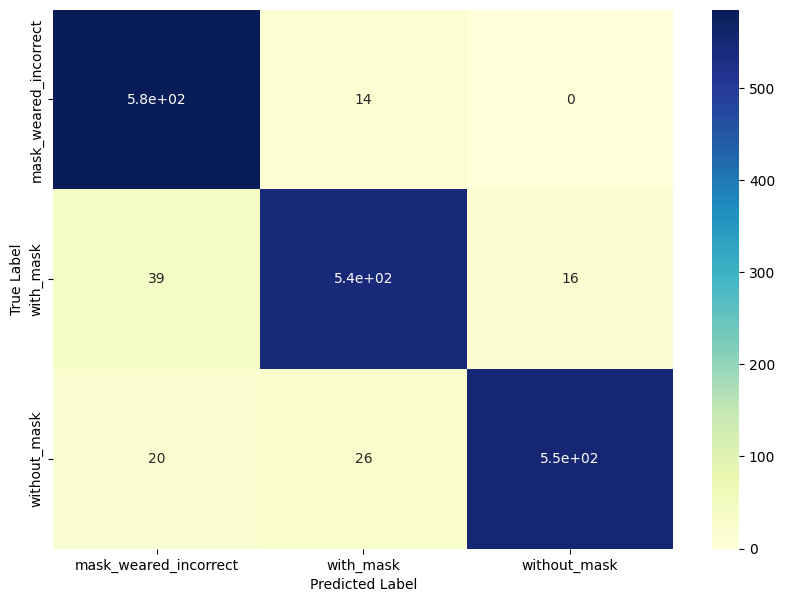

In [11]:
Y_true_labels = np.argmax(Y_test, axis=1)
Y_pred_labels = np.argmax(Y_predicted, axis=1)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

plt.subplots(figsize=(10, 7))
cm = confusion_matrix(Y_true_labels, Y_pred_labels, )
sns.heatmap(cm, annot = True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
[[0.440265   0.47957605 0.080159  ]
 [0.7844225  0.20779134 0.00778618]
 [0.38627684 0.57562405 0.03809917]]


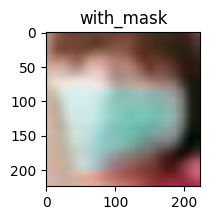

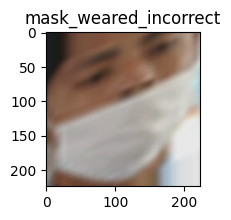

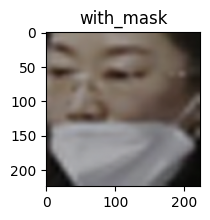

In [13]:
X = X_train
test_images = np.array([X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)]])

y_test_pred = model_2.predict(test_images)
y_test_pred_ = np.argmax(y_test_pred, axis=1)
print(y_test_pred)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

y_pred_labels = [label_list[i] for i in y_test_pred_]

i = 0
for image in test_images:
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(y_pred_labels[i])
    plt.show()
    i = i + 1

In [14]:
# Saving the fitted model 
models_dir = 'Models'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_file_path = os.path.join(models_dir, 'vgg16_modelv1.keras')
model_2.save(model_file_path)

The VGG16 model achieved an accuracy of 93.6% on the test set after being trained for 80 epochs. Now we will modify some aspects of the architecture and see how the performance changes.

In [4]:
base_model = VGG16(weights='imagenet', include_top=False)

base_model.trainable = False

for layer in base_model.layers[-5:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
output_layer = Dense(3, activation='softmax')(x)

model_2_v2 = Model(inputs=input_layer, outputs=output_layer)

model_2_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2_v2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,716,227 (56.14 MB)

 Trainable params: 7,080,963 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In the above architecture the last block (block 5) has been unfrozen i.e. the last block in VGG is now trainable meaning it's weight will be allowed to be updated. Now we will build and train the model.

In [5]:
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [6]:
history_1 = model_2_v2.fit(X_train, Y_train, validation_split = 0.2, epochs = 8)

Epoch 1/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 686s 4s/step - accuracy: 0.6098 - loss: 1.1572 - val_accuracy: 0.9123 - val_loss: 0.2633
Epoch 2/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 639s 4s/step - accuracy: 0.9313 - loss: 0.2031 - val_accuracy: 0.9673 - val_loss: 0.1032
Epoch 3/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 714s 4s/step - accuracy: 0.9703 - loss: 0.0884 - val_accuracy: 0.9715 - val_loss: 0.0751
Epoch 4/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.9739 - loss: 0.0842 - val_accuracy: 0.9555 - val_loss: 0.1788
Epoch 5/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 766s 4s/step - accuracy: 0.9801 - loss: 0.0695 - val_accuracy: 0.9756 - val_loss: 0.0692
Epoch 6/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 761s 4s/step - accuracy: 0.9886 - loss: 0.0319 - val_accuracy: 0.9694 - val_loss: 0.0958
Epoch 7/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 579s 3s/step - accuracy: 0.9851 - loss: 0.0434 - val_accuracy: 0.9889 - val_loss: 0.0505
Epoch 8/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.9898 - loss: 0.0382 - val_accuracy: 0.

In [11]:
history_2 = model_2_v2.fit(X_train, Y_train, validation_split = 0.2, epochs = 8)

Epoch 1/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.9924 - loss: 0.0212 - val_accuracy: 0.9868 - val_loss: 0.0643
Epoch 2/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step - accuracy: 0.9972 - loss: 0.0108 - val_accuracy: 0.9875 - val_loss: 0.0438
Epoch 3/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.9950 - loss: 0.0180 - val_accuracy: 0.9840 - val_loss: 0.0527
Epoch 4/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.9897 - loss: 0.0392 - val_accuracy: 0.9861 - val_loss: 0.0536
Epoch 5/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 652s 4s/step - accuracy: 0.9903 - loss: 0.0263 - val_accuracy: 0.9889 - val_loss: 0.0394
Epoch 6/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.9977 - loss: 0.0086 - val_accuracy: 0.9687 - val_loss: 0.1186
Epoch 7/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.9792 - loss: 0.0747 - val_accuracy: 0.9840 - val_loss: 0.0807
Epoch 8/8
180/180 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - accuracy: 0.9932 - loss: 0.0168 - val_accuracy: 0.

In [7]:
history_1 = history_1.history

In [12]:
history_2 = history_2.history

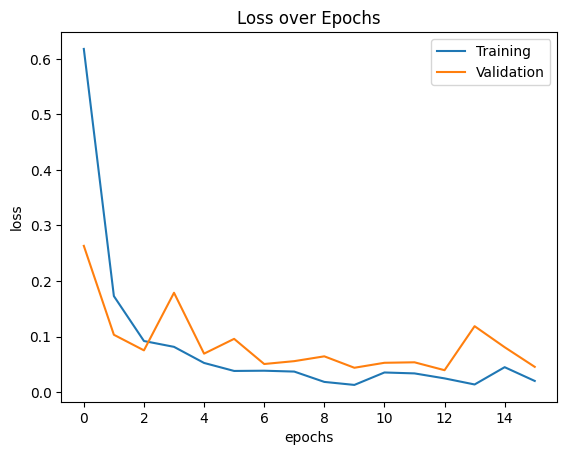

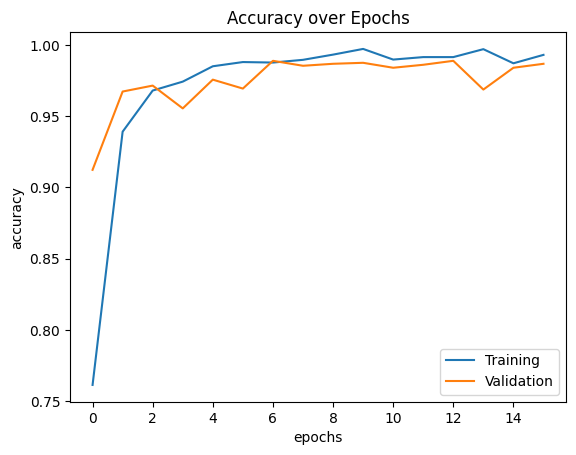

In [13]:
loss = []
val_loss = []
acc = []
val_acc= []

loss = history_1["loss"] + history_2["loss"]
val_loss = history_1["val_loss"] + history_2["val_loss"]

acc = history_1["accuracy"] + history_2["accuracy"]
val_acc = history_1["val_accuracy"] + history_2["val_accuracy"]

plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss over Epochs")
plt.show()

plt.plot(acc, label="Training")
plt.plot(val_acc, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy over Epochs")
plt.show()

In [16]:
Y_predicted = model_2_v2.predict(X_test)

accuracy = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_predicted, axis=1))
print(f'Accuracy: {accuracy}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step
Accuracy: 0.9894268224819143


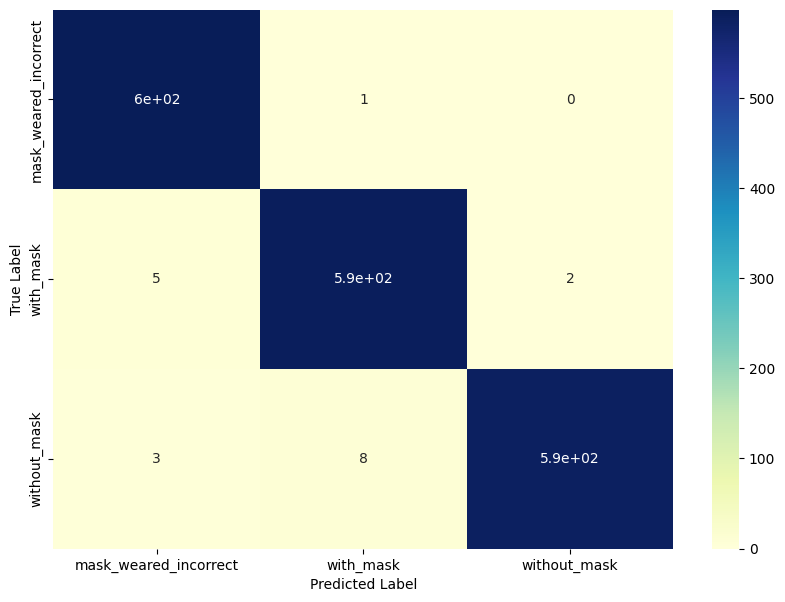

In [17]:
Y_true_labels = np.argmax(Y_test, axis=1)
Y_pred_labels = np.argmax(Y_predicted, axis=1)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

plt.subplots(figsize=(10, 7))
cm = confusion_matrix(Y_true_labels, Y_pred_labels, )
sns.heatmap(cm, annot = True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


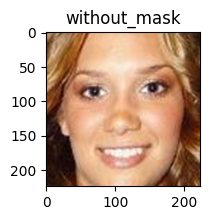

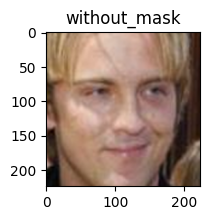

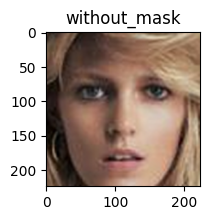

In [25]:
X = X_train
test_images = np.array([X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)]])

y_test_pred = model_2_v2.predict(test_images)
y_test_pred_ = np.argmax(y_test_pred, axis=1)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

y_pred_labels = [label_list[i] for i in y_test_pred_]

i = 0
for image in test_images:
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(y_pred_labels[i])
    plt.show()
    i = i + 1

After the modifications were applied and the model was trained on the dataset, it achieved an accuracy of 98.94% on the test set. This is a significant improve in performance than earlier and just goes to show how powerful transfer learning is.